# Assignment 1

## Exercise 1

In [1]:
# Import cell
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Utils cell
X_A = 0.5
X_B = 0.5001
N = 200000

    
def plot_figure(x,y,title):
    
    plt.figure(figsize = [6 ,3]) 
    plt.scatter(x,y, s = 70, facecolors = 'none', edgecolors = 'g') 
    plt.xlabel('x', fontsize = 13, fontstyle = "italic")
    plt.ylabel('y', fontsize = 13, fontstyle = "italic")
    plt.title(title, fontsize = 15, fontstyle = "italic")
    plt.grid()
    plt. tight_layout ()
    plt.show ()

    
def plot_compare_RNG(x1,y1, x2, y2, x3, y3):
    
    fig, axs = plt.subplots(2, 3, figsize = (25,15))

    axs[0,0].scatter(x1,y1, s = 70, facecolors = 'none', edgecolors = 'g') 
    axs[0,0].set_title(f'GGL', fontstyle = 'italic', fontsize = 25)
    axs[0,0].set_xlabel ('X', fontsize = 15)
    axs[0,0].set_ylabel ('Y', fontsize = 15)
    axs[0,0].grid()

    axs[0,1].scatter(x2,y2, s = 70, facecolors = 'none', edgecolors = 'g') 
    axs[0,1].set_title(f'RAN3', fontstyle = 'italic', fontsize = 25)
    axs[0,1].set_xlabel ('X', fontsize = 15)
    axs[0,1].set_ylabel ('Y', fontsize = 15)
    axs[0,1].grid()

    axs[0,2].scatter(x3,y3, s = 70, facecolors = 'none', edgecolors = 'g') 
    axs[0,2].set_title(f'Mersenne-Twister', fontstyle = 'italic', fontsize = 25)
    axs[0,2].set_xlabel ('X', fontsize = 15)
    axs[0,2].set_ylabel ('Y', fontsize = 15)
    axs[0,2].grid()
    
    
    # idx1 = np.argwhere((X_A <= x1) & (x1 <= X_B))
    # idx2 = np.argwhere((X_A <= x2) & (x2 <= X_B))
    # idx3 = np.argwhere((X_A <= x3) & (x3 <= X_B))
    
    # x1_int = x1[idx1]
    # x2_int = x2[idx2]
    # x3_int = x3[idx3]
    
    # y1_int = y1[idx1]
    # y2_int = y2[idx2]
    # y3_int = y3[idx3]
    
    axs[1,0].scatter(x1,y1, s = 70, facecolors = 'none', edgecolors = 'g') 
    axs[1,0].set_title(f'GGL', fontstyle = 'italic', fontsize = 25)
    axs[1,0].set_xlabel ('X', fontsize = 15)
    axs[1,0].set_ylabel ('Y', fontsize = 15)
    axs[1,0].set_xlim(left= X_A, right=X_B)
    axs[1,0].grid()

    axs[1,1].scatter(x2,y2, s = 70, facecolors = 'none', edgecolors = 'g') 
    axs[1,1].set_title(f'RAN3', fontstyle = 'italic', fontsize = 25)
    axs[1,1].set_xlabel ('X', fontsize = 15)
    axs[1,1].set_ylabel ('Y', fontsize = 15)
    axs[1,1].set_xlim(left= X_A, right=X_B)
    axs[1,1].grid()

    axs[1,2].scatter(x3,y3, s = 70, facecolors = 'none', edgecolors = 'g') 
    axs[1,2].set_title(f'Mersenne-Twister', fontstyle = 'italic', fontsize = 25)
    axs[1,2].set_xlabel ('X', fontsize = 15)
    axs[1,2].set_ylabel ('Y', fontsize = 15)
    axs[1,2].set_xlim(left= X_A, right=X_B)
    axs[1,2].grid()


The 1-th moment of the random generated points is: 0.50
The 2-th moment of the random generated points is: 0.33


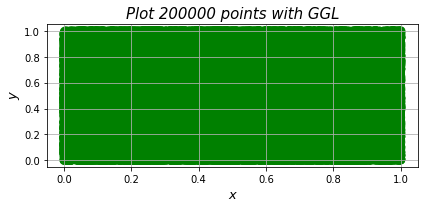

In [3]:
# Impelementation of GGL 
def GGL(a, m, x_i):
    return (a * x_i) % m 

x_0 = 1 # Initial seed 
x_i = x_0

A = 16807
M = pow(2, 31) -1

rand = list()

for i in range(N):
    x_i = GGL(A, M, x_i)
    norm_x_i = x_i / M 
    rand.append(norm_x_i)

rand = np.array(rand)

mean = rand.mean()
var = rand.var()
moment_2 = var + mean**2

print(f"The 1-th moment of the random generated points is: {mean:.2f}")
print(f"The 2-th moment of the random generated points is: {moment_2:.2f}")



x1 = rand[::2]
y1 = rand[1::2]

title = f"Plot {N} points with GGL"
plot_figure(x1,y1, title)

The 1-th moment of the random generated points is: 0.50
The 2-th moment of the random generated points is: 0.33


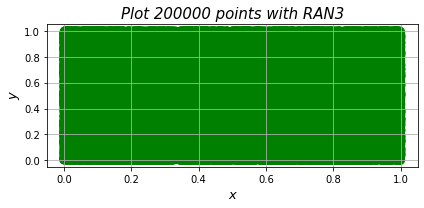

In [4]:
# Implementation of RAN3
def RAN3(x, m):
    return(x[-55] - x[-24]) % m
    

# Initialization phase: run GGL 
initial_runs = 55
x_0 = 1 
x_i = x_0

rand = list()

for i in range(initial_runs):
    x_i = GGL(A, M, x_i)
    rand.append(x_i)



M_RAN3 = pow(10, 9)

for i in range(N):
    x_i = RAN3(rand, M_RAN3)
    rand.append(x_i)

rand = np.array(rand)
rand = rand[55:]/M_RAN3

mean = rand.mean()
var = rand.var()
moment_2 = var + mean**2

print(f"The 1-th moment of the random generated points is: {mean:.2f}")
print(f"The 2-th moment of the random generated points is: {moment_2:.2f}")


x2 = rand[::2]
y2 = rand[1::2]

title = f"Plot {N} points with RAN3"
plot_figure(x2, y2,  title)

The 1-th moment of the random generated points is: 0.50
The 2-th moment of the random generated points is: 0.33


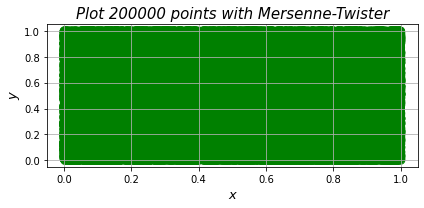

In [5]:
# Implement built-in random generator in Python 

rand = list()
for _ in range(N):
    x_i = random.random()
    rand.append(x_i)

rand = np.array(rand)

mean = rand.mean()
var = rand.var()
moment_2 = var + mean**2

print(f"The 1-th moment of the random generated points is: {mean:.2f}")
print(f"The 2-th moment of the random generated points is: {moment_2:.2f}")

# Plot the result
x3 = rand[::2]
y3 = rand[1::2]

title = f"Plot {N} points with Mersenne-Twister"
plot_figure(x3, y3,  title)

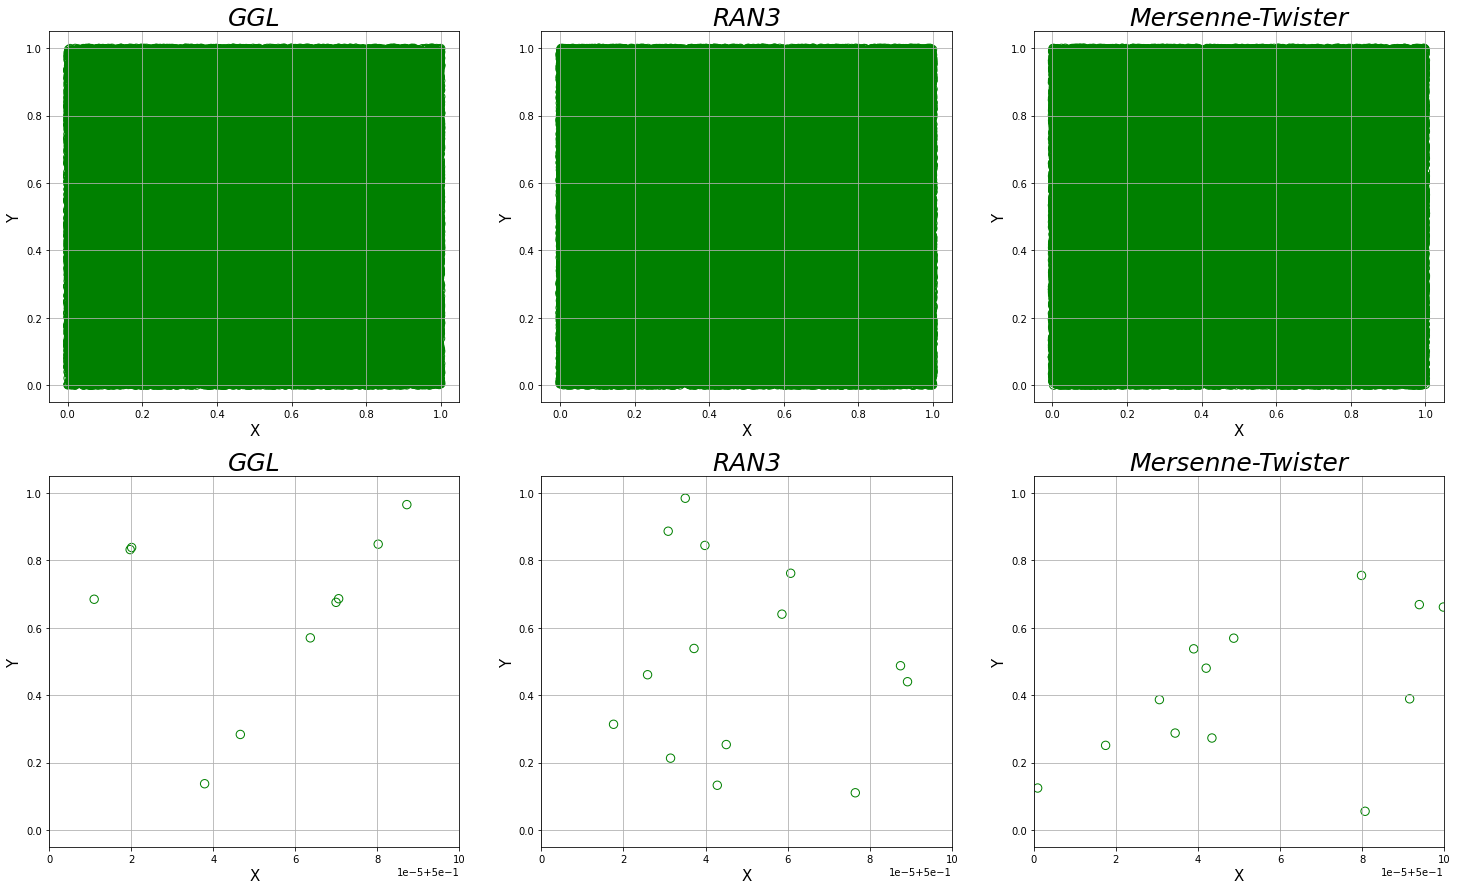

In [6]:
# Plot comparison fig
plot_compare_RNG(x1, y1, x2, y2, x3, y3)

From the plots is possible to observe that the random points generated follows a $ X \sim U(0,1)\text{ and }  Y \sim U(0,1)$. With $N = 20000$ ($N$- number of generated points) the points cover completely the square given by $ (0,1) \times (0,1)$.

Moreover, all three generators work fine since they respect the $moment\ test$ for $k = 1$ since they have a mean of $0.5$ and for $k = 2$ since the second moment is $0.33$.

The second row of plots is used to inspect a little interval $[0.5000, 0.5001]$. As it possible to see when the number of points, $N$, is lower it is difficult to distinguish between generators. Instead, by trying to restart the notebook with an $N$ greater than $20000$ is possible to observe some differences.

## Exercise 2

In [7]:
# Utils cell
def plot_figure(agents: np.array, log: bool = False):
    
    fig, axs = plt.subplots(1, 4, figsize = (15,2))
    bins = [10, 30, 50, 100]

    axs[0].hist(agents, facecolor = 'cyan', edgecolor = 'b', bins = bins[0], linewidth = 1, density = True)
    axs[0].set_title(f'Hist with {bins[0]} bins', fontstyle = 'italic')
    axs[0].set_xlabel ('Optimism/Pessimism', fontsize = 10)
    axs[0].set_ylabel ('PMF', fontsize = 10)
    axs[0].grid()


    axs[1].hist(agents, facecolor = 'cyan', edgecolor = 'b', bins = bins[1], linewidth = 1, density = True)
    axs[1].set_xlabel ('Optimism/Pessimism', fontsize = 10)
    axs[1].set_title(f'Hist with {bins[1]} bins', fontstyle = 'italic')
    axs[1].grid()


    axs[2].hist(agents, facecolor = 'cyan', edgecolor = 'b', bins = bins[2], linewidth = 1, density = True)
    axs[2].set_xlabel ('Optimism/Pessimism', fontsize = 10)
    axs[2].set_title(f'Hist with {bins[2]} bins', fontstyle = 'italic')
    axs[2].grid()


    axs[3].hist(agents, facecolor = 'cyan',  edgecolor = 'b', bins = bins[3], linewidth = 1, density = True)
    axs[3].set_xlabel ('Optimism/Pessimism', fontsize = 10)
    axs[3].set_title(f'Hist with {bins[3]} bins', fontstyle = 'italic')
    axs[3].grid()
    
    if log:
        for i in range(4):
            axs[i].set_yscale('log')

        

    plt.show ()

### Exercise 2.a

The mean of the distribution is 50.00 and the variance is 100.15.


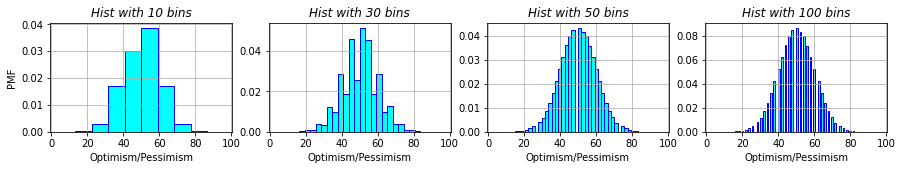

In [8]:
NR_AGENTS = 500000
NR_INTERACTIONS = 100

agents = np.full((NR_AGENTS, ), 50)

for i in range(NR_AGENTS):
    for _ in range(NR_INTERACTIONS):
        u = np.random.random()
        value = -1
        if u >= 0.5: 
            value = 1
            
        agents[i] = agents[i] + value

print(f"The mean of the distribution is {agents.mean():.2f} and the variance is {agents.var():.2f}.")
plot_figure(agents)

As it is possible to observe from the above plot, the distribution tends to be Gaussian. As the number of bins grows it is easier to notice that. This is an example of the most famous statistical theorem: the Central Limit Theorem. We can see the optimism/pessimism of each person as a random variable, $S_i$, which is the sum of a constant value ($50$) and $100$ uniform discrete random variables ($U_i \sim U\{-1, 1\}$):

$$S_i = 50 + U_1 + U_2 + \ldots + U_{100}$$.

In this case each $S_i$ follows a normal distribution with $\mathbb{E}[S_i] = 50$ and $Var[S_i] = 100$. 


### Exercise 2.b

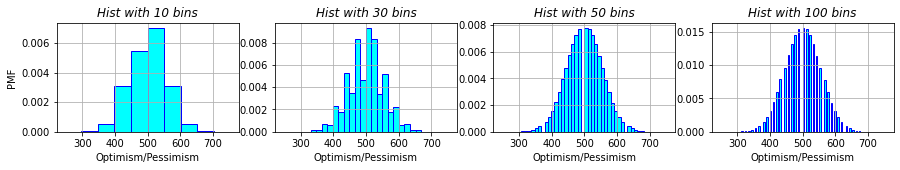

In [9]:
NR_AGENTS = 500000
NR_INTERACTIONS = 100

agents = np.full((NR_AGENTS, ), 50)

for i in range(NR_AGENTS):
    for _ in range(NR_INTERACTIONS):
        u = np.random.random()
        value = -0.5
        if u >= 0.5: 
            value = 10
            
        agents[i] = agents[i] + value

plot_figure(agents)

Similar to point **2.a** we obtain a Gaussian distribution, the only differences are the mean and the variance. These differences are given because the distribution of the random variable is changed from a $U\{-1,1\}$ to $U\{-0.5,10\}$.

### Exercise 2.c

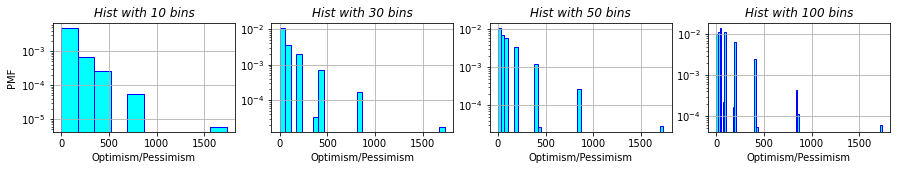

In [10]:
NR_AGENTS = 500000
NR_INTERACTIONS = 10

agents = np.full((NR_AGENTS, ), 50)

for i in range(NR_AGENTS):
    for j in range(NR_INTERACTIONS):
        u = np.random.random()
        mult = 1/0.7
        if u >= 0.5: 
            mult = 0.7
        
        agents[i] = agents[i] * mult

plot_figure(agents, True)

Also, this last exercise is a representation of the Central Limit Theorem, but since the distribution is given by a multiplicative process the result is a Lognormal distribution.

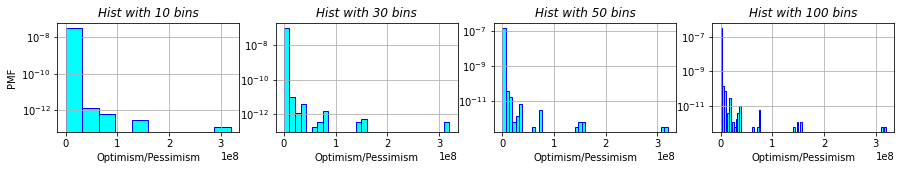

In [11]:
NR_AGENTS = 500000
NR_INTERACTIONS = 100

agents = np.full((NR_AGENTS, ), 50)

for i in range(NR_AGENTS):
    for j in range(NR_INTERACTIONS):
        u = np.random.random()
        mult = 1/0.7
        if u >= 0.5: 
            mult = 0.7
        
        agents[i] = agents[i] * mult

plot_figure(agents, True)

In this second, part I tried to plot the result of the multiplicative process after $100$ interactions. The problem with this representation is that the optimism/pessimism scale goes from $0 \text{ to } 3 \times 10^{8}$.